# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **TMDB-movies description**: What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over 100 million dollars to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

## **columns**: 
* id    
* imdb_id   
* popularity           
* budget          
* revenue         
* original_title  
* cast            
* homepage         
* director        
* tagline         
* keywords        
* overview        
* genres             
* production_companies
* release_date        
* vote_count          
* vote_average        
* release_year        
* budget_adj          
* revenue_adj 

>Here is a link to the dataset on kaggle  [link](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata "link to tmdb-movie data on kaggle")


### Question(s) for Analysis
#### some of the questions that we will like to answer are: 
>**Question 1**: What kinds of **properties** are associated with movies that have high **revenues**?.

>**Question 2**: Which genres are most popular from year to year?

>**Question 3**: What are all times highest and lowest **profit** movie?

>**Question 4**: What are all times highest and lowest **voted** movie?

>**Question 5**: What **cast,directors,production companies** were most frequent(The top 20) over time ?

In [1]:
#importation of all the packages that we 
#plan to use.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

## General properties
The Data is read from the csv file and we view Three random sample of the dataset

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
tmdb_df = pd.read_csv('tmdb-movies.csv')

In [4]:
#use the sample method to check a random sample of the dataset(dataframe)
tmdb_df.sample(frac = 0.5,random_state=42).head(3).T

,8468,1511,2638
id,11674,26505,644
imdb_id,tt0115433,tt0940657,tt0212720
popularity,1.419885,0.691392,2.971372
budget,54000000,87000000,100000000
revenue,320689294,0,235926552
original_title,101 Dalmatians,Arthur et la vengeance de Maltazard,A.I. Artificial Intelligence
cast,Glenn Close|Jeff Daniels|Joely Richardson|Joan...,Freddie Highmore|Mia Farrow|Logan Miller|Rober...,Haley Joel Osment|Frances O'Connor|Sam Robards...
homepage,NaN,NaN,NaN
director,Stephen Herek,Luc Besson,Steven Spielberg
tagline,So many dogs. So little time.,NaN,Journey to a world where robots dream and desire.


In [5]:
#using describe to inspect the statistical attributes of the datasets
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
print('The dataset has {} rows and {} columns'.format(tmdb_df.shape[0],tmdb_df.shape[1]))

The dataset has 10866 rows and 21 columns


In [8]:
tmdb_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

#### Has seen above, pandas ProfileReport shows us the columns with **High cardinality and correlations**,it also shows us columns with missing dataand a lot more that will help with the analysis

## Data Cleaning
### clean the duplicated rows,columns and NAN values from the dataset
 

Duplicated values will be checked for

In [9]:

#lets get the number of duplicated rows in the dataset ND DROP THEM
def df_drop_duplicates(df):
    """
    This helper function is used to check if dataframe has duplicated data and drop them if they exist
    note: this function does not keep the last occurence of the duplicated data
    df ------> The dataframe containing/not containing duplicated data
    """
    #get the numbe of duplicates
    num_of_duplicates = sum(tmdb_df.duplicated())
    if num_of_duplicates >0 : 
        print('This dataframe contains {} dupicated data,that will now be dropped'.format(num_of_duplicates))
        df.drop_duplicates(inplace = True)
    elif num_of_duplicates == 0 :
        print('This dataframe does not contain any duplicated data')

df_drop_duplicates(tmdb_df)

This dataframe contains 1 dupicated data,that will now be dropped


In [10]:
#we check gain to see the numbe rof duplicated data
df_drop_duplicates(tmdb_df)

This dataframe does not contain any duplicated data


we observe that some columns/rows are not relevant for the analysis, so we will write a function that drops them

In [11]:
def drop_columns_rows(df,cols_rows,axis = None):
    if axis == 1:
        for col in cols_rows:
            df.drop(columns=col,inplace=True,axis = axis)
    elif axis == 0:
        for rows in cols_rows:
            df.drop(columns=col,inplace=True,axis = axis)

In [12]:
#now we list the columns we do not need
cols = ['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj','keywords']
drop_columns_rows(tmdb_df,cols,axis=1)

In [13]:
#use the gt_info function to check the dataframe again,we see that the columns have been deleted
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   director              10821 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ MB


In [14]:
#we observe that the release_date column is not in datetime format
#next thing to do is to change the release_date column to a datetime datatype
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

In [15]:
#we can see that the releaase_Date column has been changed to datetime64[ns] format
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   runtime               10865 non-null  int64         
 8   genres                10842 non-null  object        
 9   production_companies  9835 non-null   object        
 10  release_date          10865 non-null  datetime64[ns]
 11  vote_count            10865 non-null  int64         
 12  vote_average          10865 non-null  float64       
 13  release_year    

In [16]:
#we also observe that there are some missing values in some of the columns
def get_missing_cols(df):
    """
    This function returns the missing columns in the datframe
    df ------>Dataframe
    """
    val = 0
    cols = []
    for col,missing in df.isna().sum().items():
        if missing > 0:
            print(col,'is missing ------->',missing,'values')
            val += missing
            cols.append(col)
    return cols

In [17]:
missing_col = get_missing_cols(tmdb_df)

cast is missing -------> 76 values
director is missing -------> 44 values
genres is missing -------> 23 values
production_companies is missing -------> 1030 values


In [18]:
#fill missing object data with 'missing'
def fill_missing_cols(df,cols):
    """
    This function fills the missing column with the string 'missing'
    """
    for col in cols:
        df[col].fillna(str(col + '_missing'),inplace = True)

In [19]:
# we fill the missing data in each col with the column name concatenated to missing
fill_missing_cols(tmdb_df,missing_col)

In [20]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10865 non-null  object        
 6   director              10865 non-null  object        
 7   runtime               10865 non-null  int64         
 8   genres                10865 non-null  object        
 9   production_companies  10865 non-null  object        
 10  release_date          10865 non-null  datetime64[ns]
 11  vote_count            10865 non-null  int64         
 12  vote_average          10865 non-null  float64       
 13  release_year    

we can now see that columns containing missing values have been filled

Some pre exploratory analysis can be done before we finalise our cleaning

In [21]:
#this answers the question of how many company made a revenue after having spent nothing making the movie
np.logical_and(tmdb_df['budget'] == 0,tmdb_df['revenue'] >0).sum()

995

In [22]:
#this answers the question of how many company did not make a revenue after having spent making the movie
#tmdb_df[tmdb_df['revenue'] == 0].shape[0]
np.logical_and(tmdb_df['budget'] > 0,tmdb_df['revenue'] ==0).sum()

1315

In [23]:
#this shows that there are 4701 movies that generate a revenue but 
#didnt spend a budget either so perhaps they didnt release the movies
tmdb_df.query('budget == 0 and revenue == 0').shape[0]

4701

### before we move to exploratory data analysis,we can get the movies that never aired...

In [24]:
tmdb_df.query('budget == 0 and revenue == 0 and runtime == 0').head(30)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
92,370687,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015
334,361931,0.357654,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",2015-11-09,80,6.5,2015
410,339342,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,0,Horror,production_companies_missing,2015-01-01,15,5.6,2015
445,353345,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,0,Horror,WT Canada Productions,2015-10-09,52,5.0,2015
486,333653,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,2015-04-05,11,5.4,2015
595,341051,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,0,Horror,production_companies_missing,2015-01-01,11,4.6,2015
616,325843,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,0,Drama|Comedy,production_companies_missing,2015-11-10,20,6.6,2015
1241,296370,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,director_missing,0,Romance|Music|Comedy,production_companies_missing,2014-01-01,18,5.7,2014
1293,286256,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,0,Documentary|Drama|Music,Globo Filmes,2014-10-30,14,6.0,2014
1849,18247,0.120350,0,0,Spectacular!,Nolan Gerard Funk|Jesse Moss|Britt Irvin|Tammi...,Robert Iscove,0,Drama|Music,production_companies_missing,2009-02-16,13,5.2,2009


In [25]:
#we will now drop these columns with values=0 for revenue and budget
tmdb_df['revenue'] = tmdb_df['revenue'].replace(0,np.NAN)
tmdb_df['budget'] = tmdb_df['budget'].replace(0,np.NAN)

In [26]:
tmdb_df['revenue'].isna().sum()

6016

In [27]:
tmdb_df['budget'].isna().sum()

5696

In [28]:
tmdb_df.dropna(subset = ['budget','revenue'],inplace = True)

In [29]:
tmdb_df.isna().sum().sum()

0

In [30]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   popularity            3854 non-null   float64       
 2   budget                3854 non-null   float64       
 3   revenue               3854 non-null   float64       
 4   original_title        3854 non-null   object        
 5   cast                  3854 non-null   object        
 6   director              3854 non-null   object        
 7   runtime               3854 non-null   int64         
 8   genres                3854 non-null   object        
 9   production_companies  3854 non-null   object        
 10  release_date          3854 non-null   datetime64[ns]
 11  vote_count            3854 non-null   int64         
 12  vote_average          3854 non-null   float64       
 13  release_year     

In [31]:
#let's get the profit of each movies
tmdb_df['Profit'] = tmdb_df['revenue'] - tmdb_df['budget']
tmdb_df['Profit'].astype(np.float64);

Next,Lets gets the number of movies that made any profit whatsoever

In [32]:
tmdb_df[tmdb_df['Profit'] > 0][['original_title','Profit']].shape

(2778, 2)

2778 movies made some kind of profit

In [33]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3854 non-null   int64         
 1   popularity            3854 non-null   float64       
 2   budget                3854 non-null   float64       
 3   revenue               3854 non-null   float64       
 4   original_title        3854 non-null   object        
 5   cast                  3854 non-null   object        
 6   director              3854 non-null   object        
 7   runtime               3854 non-null   int64         
 8   genres                3854 non-null   object        
 9   production_companies  3854 non-null   object        
 10  release_date          3854 non-null   datetime64[ns]
 11  vote_count            3854 non-null   int64         
 12  vote_average          3854 non-null   float64       
 13  release_year     

In [34]:
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,Profit
count,3854.000000,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03
mean,39888.185262,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,7.048292e+07
std,67222.527399,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,1.506195e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,-4.139124e+08
25%,6073.500000,0.462367,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,-1.321535e+06
50%,11321.500000,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,2.002019e+07
75%,38573.250000,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,8.170331e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,2.544506e+09


In the process of cleaning this data,one duplicated data was dropped alongside rows containing NAN and 0  
resulting in a total of 7011 rows being dropped,columns that were deemed irrelevant e.g 'homepage' to the analysis were 
also dropped,also the release_date column was parsed to a datetime datatype

Another column 'Profit' was created to be the difference between the revenue and budget

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What kinds of properties are associated with movies that have high revenues?)

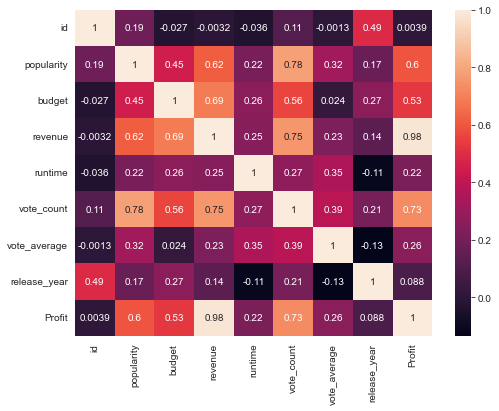

In [35]:
#before any answer is answered, we can plot a few statistical plots to get a good insight 
corr_mat = tmdb_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat,annot=True);

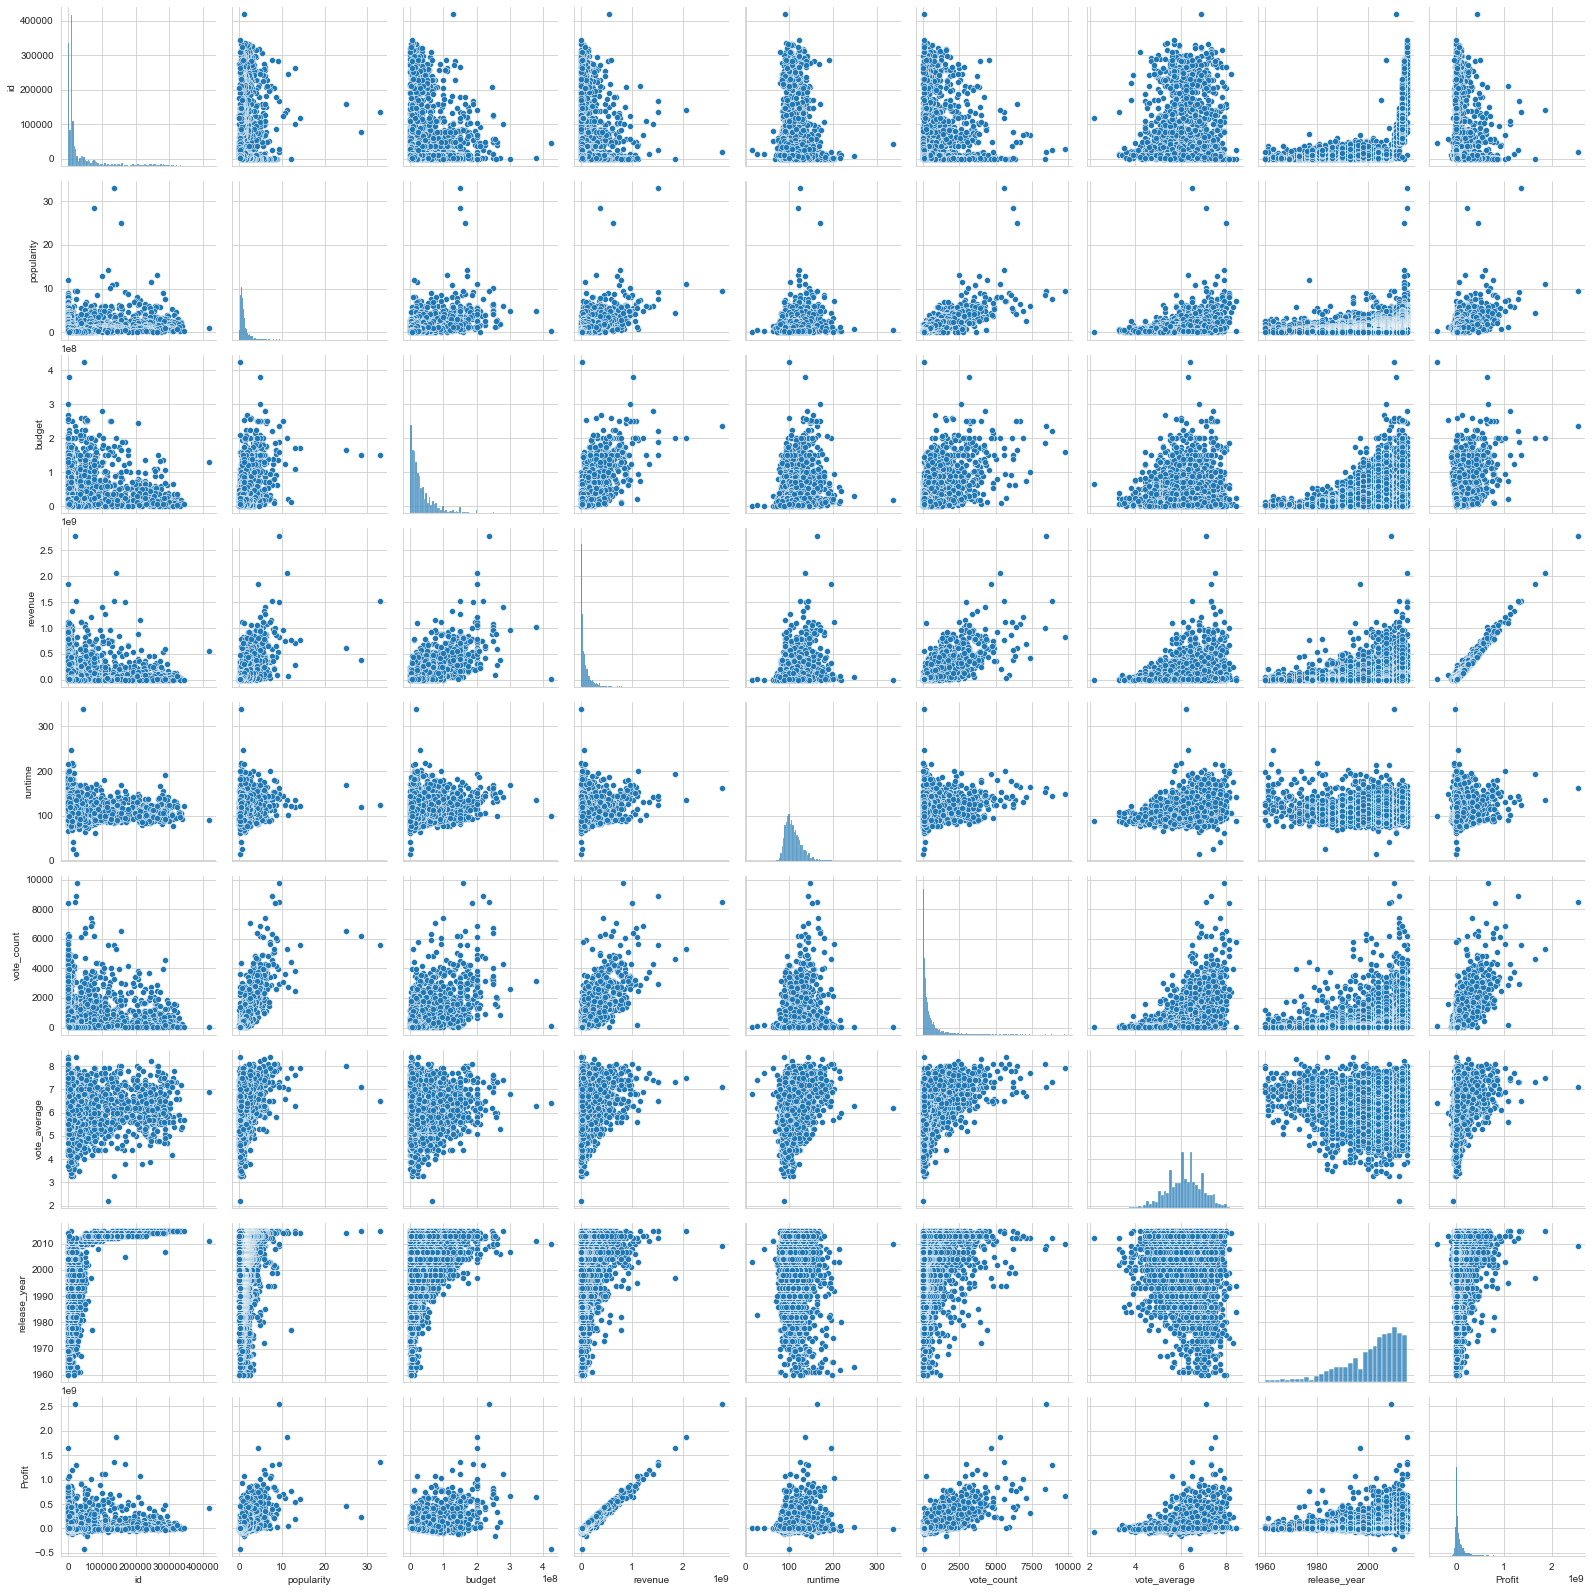

In [36]:
sns.pairplot(tmdb_df,diag_kind="hist");

### It is observed that there's a positive correlation between profit and revenue

In [37]:
#to answer the first question, we have to take a good look at revenue
#we use pandas series to get the revenue and check its statistical feature
rev_series = pd.Series(tmdb_df.revenue)
rev_series.describe()

count    3.854000e+03
mean     1.076866e+08
std      1.765393e+08
min      2.000000e+00
25%      1.360003e+07
50%      4.480000e+07
75%      1.242125e+08
max      2.781506e+09
Name: revenue, dtype: float64

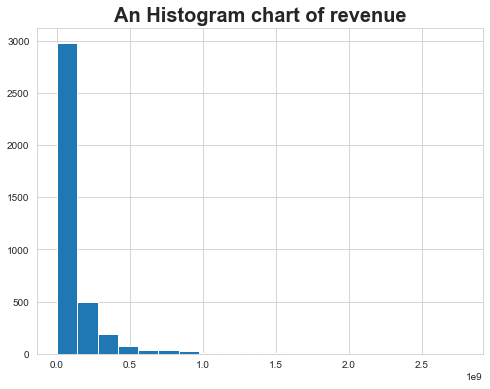

In [38]:
plt.figure(figsize= (8,6))
plt.hist(rev_series,bins = 20)
plt.grid(True)
plt.xlabel('')
plt.title('An Histogram chart of revenue',fontdict={'weight':'bold','size':20})
plt.show()

In [39]:
#we can group release_year by revenue to get the mean of revenue for all the years 
rev_per_year = tmdb_df.groupby('release_year').revenue.count()

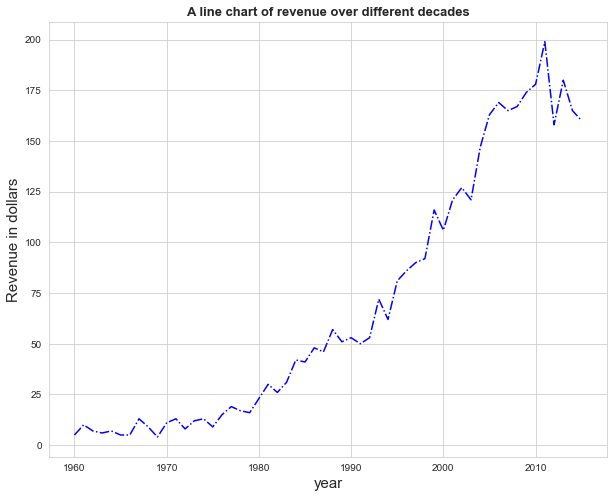

In [40]:
#we then plot a line chart to see the trend of revenue per decade
plt.figure(figsize = (10,8))
plt.plot(rev_per_year,'b-.')
plt.title('A line chart of revenue over different decades',fontdict={'weight':'bold','size': 13})
plt.xlabel('year',fontsize = 15)
plt.ylabel('Revenue in dollars',fontsize = 15)
plt.show()

We can observe from the chart that there is an upward trend in revenue over the decades

In [41]:
#next,we try to change the years into decades
#the years in the dataframe spans 5 decades from 60s to 2010s
tmdb_df_release_years = np.array(tmdb_df.release_year.unique())
tmdb_df_release_years

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [42]:
tmdb_df_year_bins = np.array([1960,1970,1980,1990,2000,2010,2015])
tmdb_df_year_labels = np.array(['60s','70s','80s','90s','2000s','2010s'])
tmdb_df['decades'] = pd.cut(tmdb_df['release_year']
                            ,bins= tmdb_df_year_bins
                            ,labels =tmdb_df_year_labels)
tmdb_df.sample(frac = 0.5,random_state=42).head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,Profit,decades
8918,9037,0.475775,13200000.0,15171476.0,Grease 2,Maxwell Caulfield|Michelle Pfeiffer|Lorna Luft...,Patricia Birch,115,Comedy|Drama|Family|Music|Romance,Paramount Pictures,1982-06-11,92,5.3,1982,1971476.0,80s
1539,13804,0.580292,85000000.0,363164265.0,Fast & Furious,Vin Diesel|Paul Walker|Jordana Brewster|Michel...,Justin Lin,107,Action|Crime|Drama|Thriller,Universal Pictures|Original Film|One Race Prod...,2009-04-02,1661,6.4,2009,278164265.0,2000s
831,177047,0.688179,2000000.0,48390.0,Decoding Annie Parker,Samantha Morton|Helen Hunt|Aaron Paul|Alice Ev...,Steven Bernstein,91,Drama,Media House Capital|Unified Pictures|Decoding ...,2014-05-02,23,5.2,2014,-1951610.0,2010s


In [43]:
#we then get the revenue for all the different decades
revenue_per_decade = tmdb_df.groupby('decades').revenue.count()
revenue_per_decade

decades
60s        77
70s       145
80s       425
90s       808
2000s    1532
2010s     862
Name: revenue, dtype: int64

we can see that 2010's made more revenue and 60's made the least revenue,we will plot an horizontal bar chart to better understand this

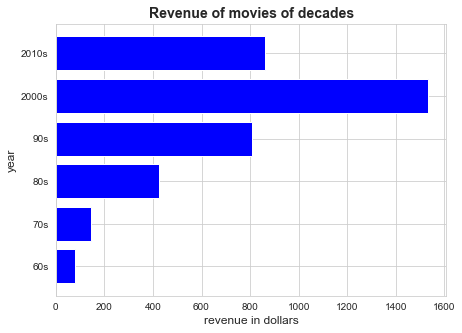

In [44]:
plt.figure(figsize = (7,5))
plt.barh(revenue_per_decade.index,revenue_per_decade.values,color = 'blue')
plt.title('Revenue of movies of decades',fontsize = 14,fontweight = 'bold')
plt.xlabel('revenue in dollars',fontsize = 12)
plt.ylabel('year',fontsize = 12)
plt.show()

Also there was slightly more revenue in the 70s than in the 80s

In [45]:
tmdb_df.revenue.describe()

count    3.854000e+03
mean     1.076866e+08
std      1.765393e+08
min      2.000000e+00
25%      1.360003e+07
50%      4.480000e+07
75%      1.242125e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [46]:
#High revenue is revenue above between 75 and 100 %
high_revenue_tmdb = tmdb_df.query('revenue > revenue.quantile(.75)')
high_revenue_tmdb.head(3).T

,0,1,2
id,135397,76341,262500
popularity,32.985763,28.419936,13.112507
budget,150000000.0,150000000.0,110000000.0
revenue,1513528810.0,378436354.0,295238201.0
original_title,Jurassic World,Mad Max: Fury Road,Insurgent
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Shailene Woodley|Theo James|Kate Winslet|Ansel...
director,Colin Trevorrow,George Miller,Robert Schwentke
runtime,124,120,119
genres,Action|Adventure|Science Fiction|Thriller,Action|Adventure|Science Fiction|Thriller,Adventure|Science Fiction|Thriller
production_companies,Universal Studios|Amblin Entertainment|Legenda...,Village Roadshow Pictures|Kennedy Miller Produ...,Summit Entertainment|Mandeville Films|Red Wago...


since we have a dataframe of high revenue, we can check the correlation between different variables

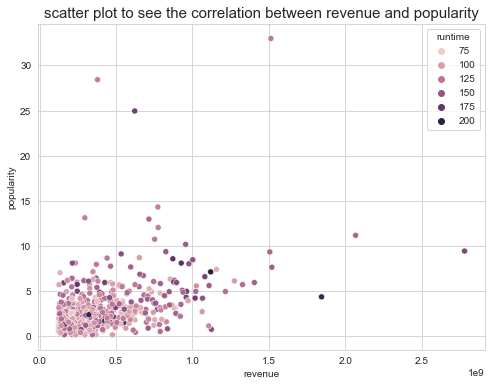

In [47]:
#a correlation chart of revenue and popularity
plt.figure(figsize = (8,6))
sns.scatterplot(x = high_revenue_tmdb.revenue,y = high_revenue_tmdb.popularity,hue=high_revenue_tmdb.runtime)
plt.title('scatter plot to see the correlation between revenue and popularity',fontsize = 15);

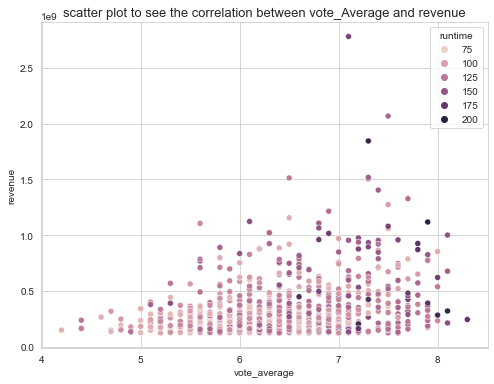

In [48]:
#next we will check how average voting affects revenue
plt.figure(figsize = (8,6))
sns.scatterplot(x = high_revenue_tmdb.vote_average,y = high_revenue_tmdb.revenue,hue=high_revenue_tmdb.runtime)
plt.title('scatter plot to see the correlation between vote_Average and revenue',fontsize = 13)
plt.show()

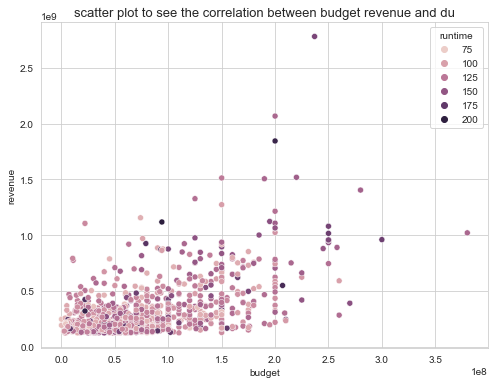

In [49]:
#and now we check the correlation between revenue and budget
plt.figure(figsize = (8,6))
sns.scatterplot(x = high_revenue_tmdb.budget,y = high_revenue_tmdb.revenue,hue=high_revenue_tmdb.runtime)
plt.title('scatter plot to see the correlation between budget revenue and du',fontsize = 13)
plt.show()

In [50]:
#we can check the corrlation of all these properties with sns heatmap
h_r_tm_df = np.array(['budget','revenue','popularity','vote_average'])
high_rev_corr = high_revenue_tmdb[h_r_tm_df].corr()

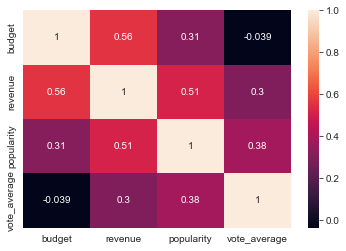

In [51]:
sns.heatmap(high_rev_corr,annot=True);

it is observed that the correlation between popularity and revenue is **0.51** and the correlation between voting_average and revenue is **0.3** and that of revenue and budget is **0.56**

### Research  Question 2(Which genres are most popular from year to year?)

To answer question 2 we have to get the most popular movie for every year

In [52]:
#we wil check the approprate columns
tmdb_df_gen = np.array(['release_year','revenue','genres','popularity'])
tmdb_df_popularity = tmdb_df[tmdb_df_gen]
tmdb_df_popularity.head(5)

,release_year,revenue,genres,popularity
0,2015,1.513529e+09,Action|Adventure|Science Fiction|Thriller,32.985763
1,2015,3.784364e+08,Action|Adventure|Science Fiction|Thriller,28.419936
2,2015,2.952382e+08,Adventure|Science Fiction|Thriller,13.112507
3,2015,2.068178e+09,Action|Adventure|Science Fiction|Fantasy,11.173104
4,2015,1.506249e+09,Action|Crime|Thriller,9.335014


The genre column is in a format that is not usable, so we will split each row it into different genre rows

From the above dataframe it is apparent that we need to work on the genre column,we will split the genre column using pandas explode function....The snippet of code below is sourced from https://ogeek.cn/qa/?qa=415229/

In [53]:
tmdb_df_splitted = tmdb_df_popularity.set_index(['release_year', 'revenue','popularity']).apply(lambda x: x.str.split('|').explode()).reset_index()

In [54]:
tmdb_df_splitted.head(5)

,release_year,revenue,popularity,genres
0,2015,1.513529e+09,32.985763,Action
1,2015,1.513529e+09,32.985763,Adventure
2,2015,1.513529e+09,32.985763,Science Fiction
3,2015,1.513529e+09,32.985763,Thriller
4,2015,3.784364e+08,28.419936,Action


In [55]:
tmdb_df_pop = tmdb_df_splitted.groupby(['release_year','genres'],as_index=False).mean()
tmdb_df_pop.head(10)

,release_year,genres,revenue,popularity
0,1960,Action,32452500.0,1.504538
1,1960,Adventure,4905000.0,1.872132
2,1960,Comedy,16050000.0,0.501564
3,1960,Drama,39000000.0,1.564871
4,1960,History,60000000.0,1.136943
5,1960,Horror,32000000.0,2.610362
6,1960,Romance,16050000.0,0.501564
7,1960,Thriller,32000000.0,2.610362
8,1960,Western,4905000.0,1.872132
9,1961,Action,16600000.0,0.464139


Now we can get the genre with the highest popularity for every year

In [56]:
#a function that returns the highest popular genre for each year
def get_highest_popularity(df):
    """
    This fuction returns a dataframe gropued by the highest popularity for the tmdb dataset
    """
    #we will get the mean popularity for each genre
    df = df.loc[df.popularity == np.max(df.popularity)]
    return df
#get the genre with highest popularity for each year
tmdb_highest_pop = tmdb_df_pop.groupby('release_year',as_index = False).apply(get_highest_popularity)
tmdb_highest_pop.head()

release_year     genres      revenue  popularity
0 5           1960     Horror   32000000.0    2.610362
  7           1960   Thriller   32000000.0    2.610362
1 11          1961  Animation  215880014.0    2.631987
2 27          1962   Thriller   59600000.0    3.170651
3 31          1963  Adventure   41949382.5    1.586280

In [57]:
tmdb_highest_pop.reset_index(drop = True,inplace=True)
tmdb_highest_pop.head()

,release_year,genres,revenue,popularity
0,1960,Horror,32000000.0,2.610362
1,1960,Thriller,32000000.0,2.610362
2,1961,Animation,215880014.0,2.631987
3,1962,Thriller,59600000.0,3.170651
4,1963,Adventure,41949382.5,1.586280


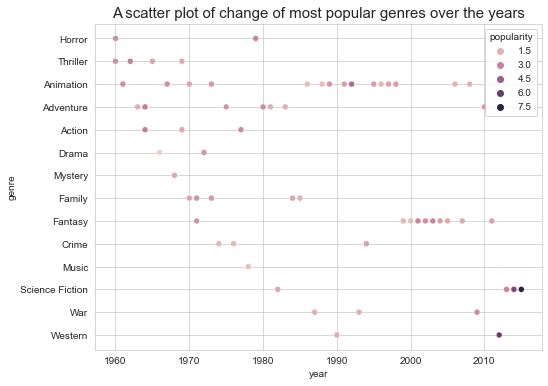

In [58]:
plt.figure(figsize = (8,6))
sns.scatterplot(x= tmdb_highest_pop.release_year,y = tmdb_highest_pop.genres,hue=tmdb_highest_pop.popularity,alpha=1.)
plt.xlabel('year')
plt.ylabel('genre')
plt.title('A scatter plot of change of most popular genres over the years',fontsize = 15);

We can deduce from the scatter plot above that:
1. between 1960 - 1970 , Thriller and Animation were the most popular genres but Thriller 
was more popular with 9.0 popularity points to Animation's 7.5
2. between 1970 - 1980,Family was the most popular with 7.5 popularity points, 
The next within that time frame is Adventure with 6.0 popularity points
3. between 1980 - 1990, Adventure and Animation were both the most popular with 6.0 popularity points
4. between 1990 - 2000,Animation was the most popular of all the genres
5. between 2000 - 2010,Fantasy was the most popular of all the genres
6. between 2010 - 2015,Science Fiction was the most popular with a strong 16.0 points in popularity

### Research  Question 3(What are all times highest and lowest profit movie?)

In [59]:
# we will use idxmax and idxmin function to get the 
#highet and lowest value for a column
def get_highest_val(df,col_name1,col_name2):
    #idxmax will help get the maximum value for a column
    maximum_index = df[col_name1].idxmax()
    max_df = pd.DataFrame(df.loc[maximum_index,:])
    return df[col_name2][maximum_index],max_df

In [60]:
highest_movie_of_all_time,hmoat_df = get_highest_val(tmdb_df,'Profit','original_title')

In [61]:
print('The movie with the highest revenue of all time is: {}'.format(highest_movie_of_all_time))

The movie with the highest revenue of all time is: Avatar


In [62]:
#we print its series
hmoat_df

,1386
id,19995
popularity,9.432768
budget,237000000.0
revenue,2781505847.0
original_title,Avatar
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,James Cameron
runtime,162
genres,Action|Adventure|Fantasy|Science Fiction
production_companies,Ingenious Film Partners|Twentieth Century Fox ...


In [63]:
def get_lowest_val(df,col_name1,col_name2):
    #idxmax will help get the maximum value for a column
    minimum_index = df[col_name1].idxmin()
    min_df = pd.DataFrame(df.loc[minimum_index,:])
    return df[col_name2][minimum_index],min_df

In [64]:
lowest_movie_of_all_time,lmoat_df = get_lowest_val(tmdb_df,'Profit','original_title')

In [65]:
print('The movie with the lowest revenue of all time is: {}'.format(lowest_movie_of_all_time))

The movie with the lowest revenue of all time is: The Warrior's Way


In [66]:
lmoat_df

,2244
id,46528
popularity,0.25054
budget,425000000.0
revenue,11087569.0
original_title,The Warrior's Way
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Sngmoo Lee
runtime,100
genres,Adventure|Fantasy|Action|Western|Thriller
production_companies,Boram Entertainment Inc.


### Research  Question 4(What are all times highest and lowest voted movie?)

In [67]:
highest_voted_movie,hvm_df = get_highest_val(tmdb_df,'vote_count','original_title')
print('The movie with the highest vote of all time is: {}'.format(highest_voted_movie))

The movie with the highest vote of all time is: Inception


In [68]:
hvm_df

,1919
id,27205
popularity,9.363643
budget,160000000.0
revenue,825500000.0
original_title,Inception
cast,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...
director,Christopher Nolan
runtime,148
genres,Action|Thriller|Science Fiction|Mystery|Adventure
production_companies,Legendary Pictures|Warner Bros.|Syncopy


In [69]:
lowest_voted_movie,lvm_df = get_lowest_val(tmdb_df,'vote_count','original_title')
print('The movie with the lowest vote of all time is: {}'.format(lowest_voted_movie))

The movie with the lowest vote of all time is: Beautiful


In [70]:
lvm_df

,1818
id,21033
popularity,0.159638
budget,1500000.0
revenue,56000.0
original_title,Beautiful
cast,Deborra-Lee Furness|Peta Wilson|Aaron Jeffery|...
director,Dean O'Flaherty
runtime,97
genres,Drama|Mystery|Thriller
production_companies,Kojo Pictures


### Research  Question 5(What cast,directors,production companies were most frequent(The top 20) over time ?)

In [71]:
#this function help to get the top 20 for each section(cast,director,production_companies)
def get_top_20(df,col):
    data = pd.Series(tmdb_df[col].str.cat(sep = '|').split('|'))
    data_counter = data.value_counts(ascending = False)
    data_to_use = data_counter.iloc[:20]
    return data_to_use

In [72]:
#we then get the top 20 for esch groups
cast_top_20 = get_top_20(tmdb_df,'cast')
directors_top_20 = get_top_20(tmdb_df,'director')
pro_comp_top_20 = get_top_20(tmdb_df,'production_companies')

some of the code below was sourced from https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/

In [73]:
#this function plots a horizontal bar for each compoent
def plot_barh_pie_top_20(col,col_name):
    """
    This function plots an horizontal bar and a pie chart
    col -------> a series
    col_name ------> the name of the series
    """
    fig = plt.figure(figsize = (24,16),constrained_layout = True)
    spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    colors = np.array(['blue','red','green','violet','purple','orange','indigo'])
    f2_ax1 = fig.add_subplot(spec[0, 0])
    col.plot.barh(ax = f2_ax1,color = colors)
    plt.xlabel('Number of movies',fontdict=dict(size = 20,weight = 'bold'))
    plt.ylabel(col_name.capitalize(),fontdict=dict(size = 20,weight = 'bold'))
    plt.yticks(ticks=np.arange(0,len(col.index)),label = list(col.index),weight = 'bold',size=20)
    plt.title('Top 20 most filmed {} against number of movies'.format(col_name),fontdict = {'weight':'bold','size':20})
    
    #the pie part of the function
    f2_ax2 = fig.add_subplot(spec[0, 1])
    my_Exp = [i*0.0159 for i in range(20)]
    my_wp = { 'linewidth' : 0.7, 'edgecolor' : "black" }
    # Creating autocpt arguments
    def func(pct):
        absolute = int(pct / 100.*20)
        return "{:.1f}%".format(pct)
    col.plot(ax = f2_ax2,kind = 'pie',explode = my_Exp,shadow = 0.001,wedgeprops = my_wp,autopct = lambda pct:func(pct))
    plt.title('Top 20 most filmed {} against number of movies in pie chart format'.format(col_name),fontdict = {'weight':'bold','size':20})
    if col_name == 'production_companies':
        plt.legend(loc = 'right',bbox_to_anchor = [1.4,0.8],title = col_name)
    else:
        plt.legend(loc = 'right',bbox_to_anchor = [1.4,0.5],title = col_name)

we will now plot a pie and horinzontal bar chart for each components for get a better overview
### please zoom in for better visualization

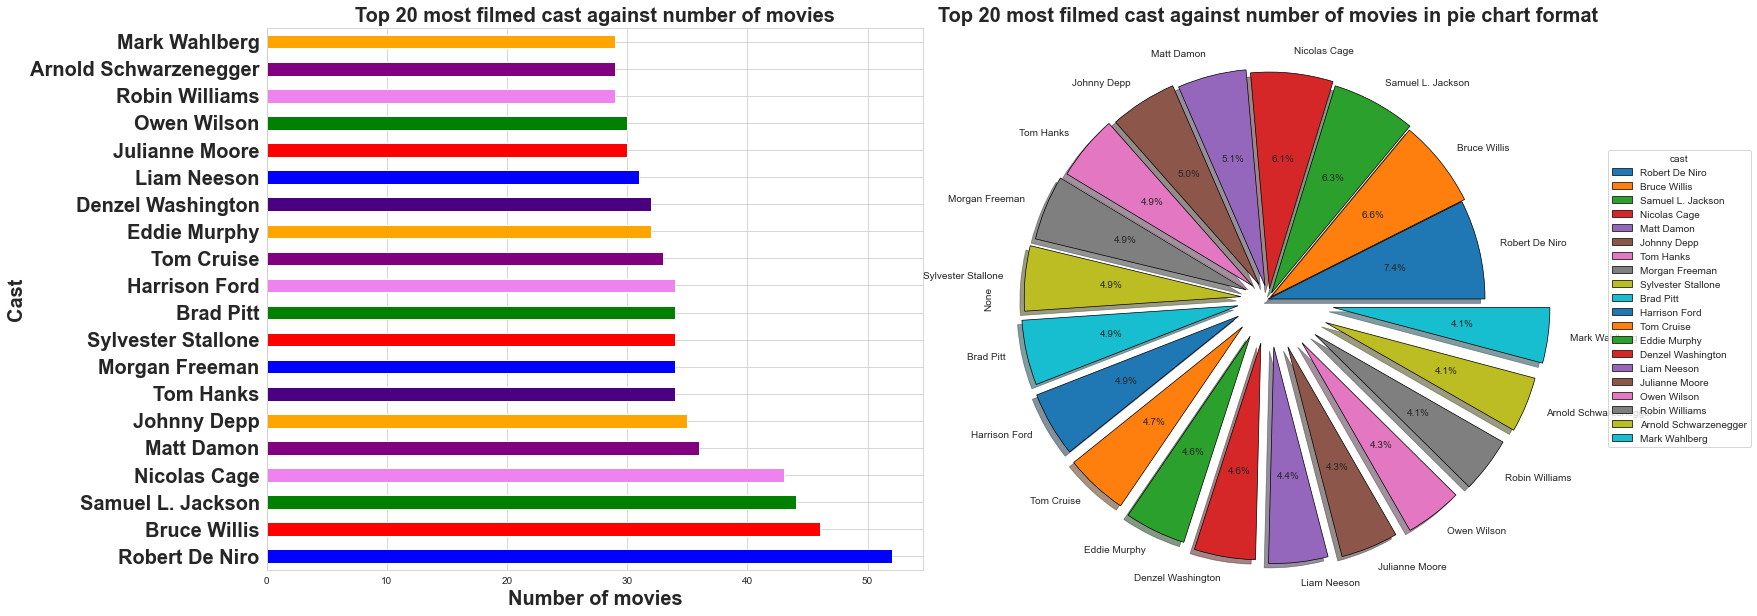

In [74]:
plot_barh_pie_top_20(cast_top_20,'cast')

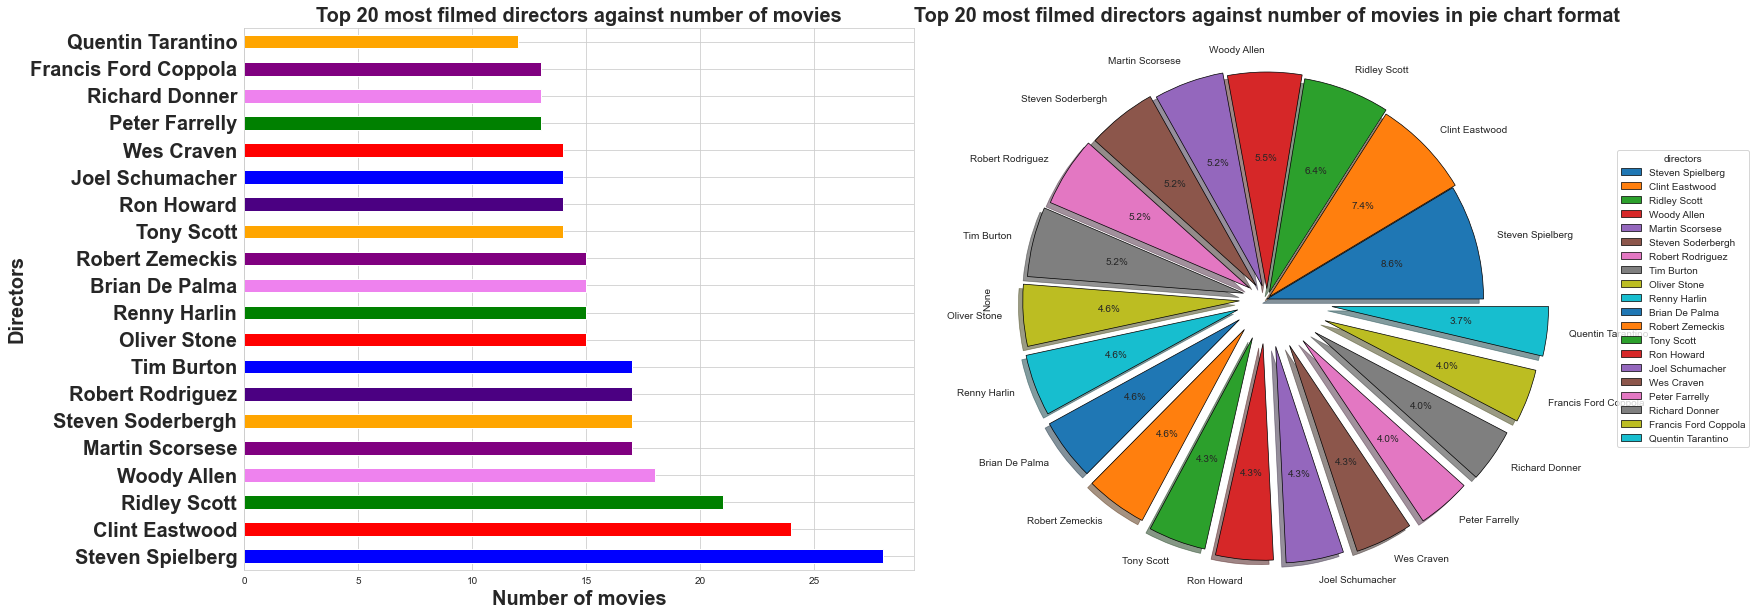

In [75]:
plot_barh_pie_top_20(directors_top_20,'directors')

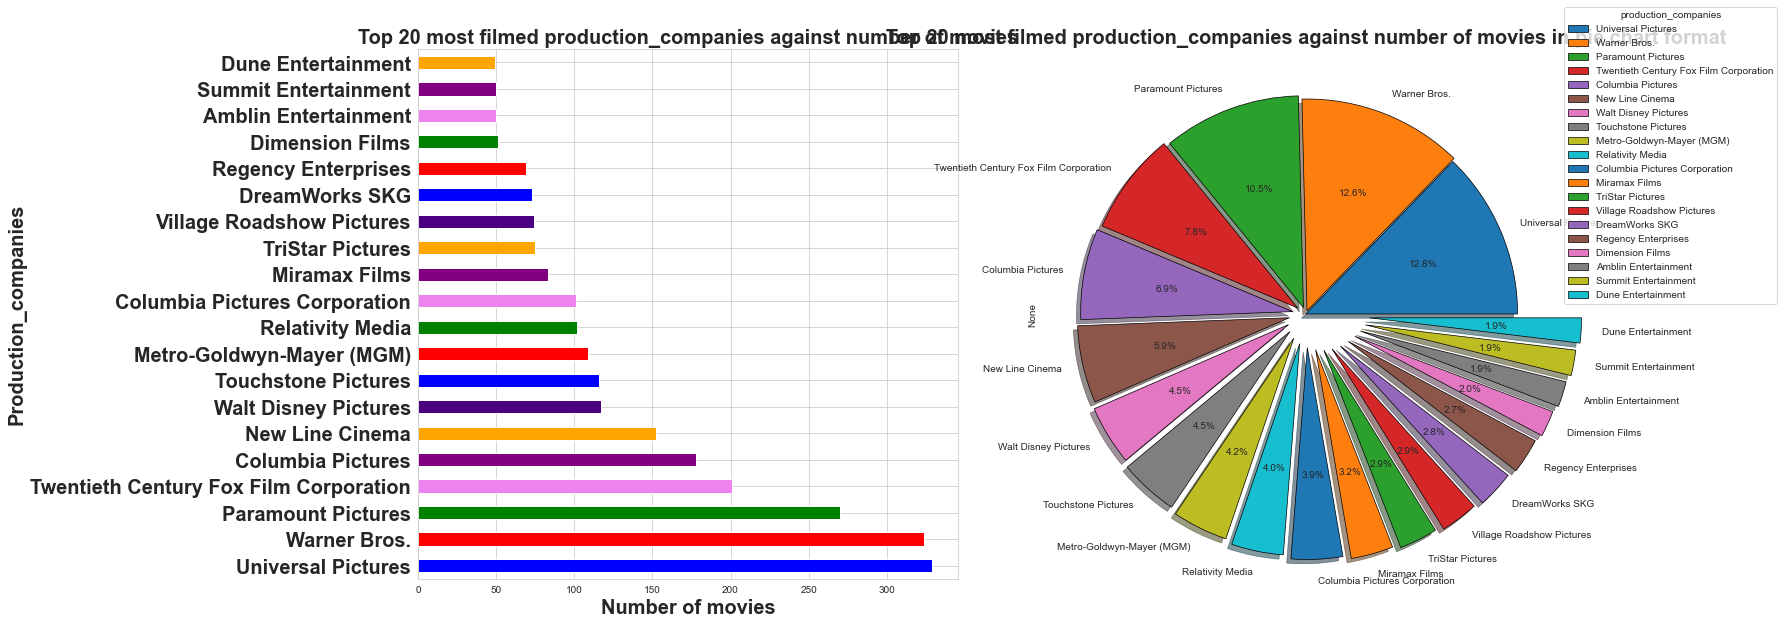

In [76]:
plot_barh_pie_top_20(pro_comp_top_20,'production_companies')

before roundng off we can check the coreelation between different variable using sns pairplot to get a better correlation chart

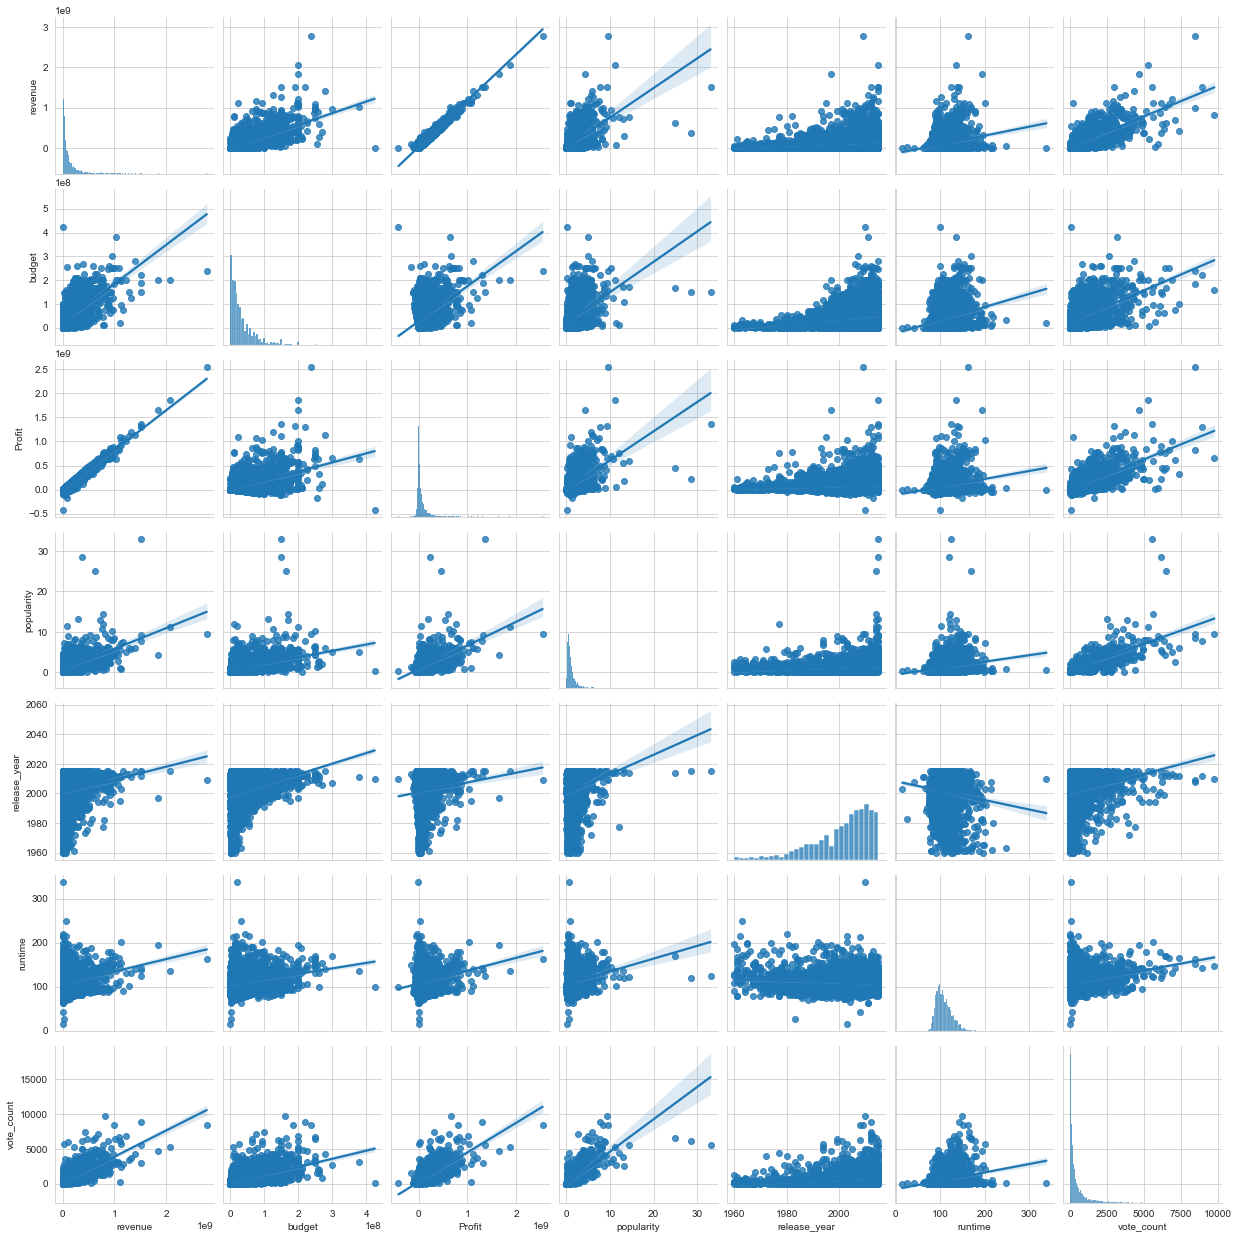

In [77]:
tmdf_df_corr_variables = ['revenue','budget','Profit','popularity','release_year','runtime','vote_count']
tmdb_df_corr = tmdb_df[tmdf_df_corr_variables]
sns.pairplot(tmdb_df_corr,kind='reg');

The pair_plot above shows that:
1. budget and revenue both have a positive correlation
2. vote_count and popularity exhibits a positive correlation
3.budget and profit exhibits a positive correlation
4. runtime and release_year exhibits a negative correlation,it is safe to say that has time goes on the runtime of movies has decreased
5.revenue and profit also exhibits a positive correlation of course

<a id='conclusions'></a>
## Conclusions
I can draw a conclusion that: 

> **1**. movies with high revenue have a positive correlation with high budget,high popularity and high voting,there's a high probability that a movie that gets serious funding will amass serious profift.

> **2**. The most popular genres are Science-fiction,Animation and Fantasy,while the least popular genres is Horror

> **3**. The most popular and successful movie is Avatar, a sci-fi movie release in 2009 directed by james cameron which grossed over two billion dollars starring zoe saldana and sam hemingsworth

> **4**. The least popular and successful movie is The Warrior's Way,an adventure movie released in 2010 drected by Sngmoo Lee making a loss of over four hundred and thirteen million dollars

> **5**. The most filmed actor of all time is robert deniro,Bruce willis,samuel L jackson

> **6**. The most filmed production company of all time is Universal pictures,Warner bros,Paramount pictures

> **7**. The most busy directors are steven spielberg,clint eastwood,ridley scott

> **8**. There was an exponential increase in revenue over the years with 21 century movies seeing a massive increase in revenue than the 60s 

> **9**. The movie with the highest vote of all time is inception,the movie with the lowest vote of all time is Beautiful

> **10**. The probability that a movie with high budget reults in high revenue is high.

**Limitation**
- The limitation to this dataset is that there are a lot of missing data and data containing 0 and NAN values that had to be cleaned, resulting in a large chunk of the data in the dataset being lost leaving only a small portion of the dataset for extraction and Exploratory Data Analysis.
 The data was changed from having 10866 to 3854 which is only about 30% of the whole data and may not better portray the datset in whole.
- There are some important questions i failed to answer like revenue per month as it goes to show the most frequent month viewers see movies the most which could in turn influence when to release a movie.


## Refrences:
- https://ogeek.cn/qa/?qa=415229/
- https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/ 
- https://stackoverflow.com/questions/58814857/conversionerror-failed-to-convert-values-to-axis-units
- https://www.geeksforgeeks.org/python-pandas-series-str-cat-to-concatenate-string/
- https://matplotlib.org/3.5.0/tutorials/intermediate/gridspec.html
- https://stackoverflow.com/questions/31361599/with-pandas-in-python-select-the-highest-value-row-for-each-group

In [78]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1